# 1. Importing packages and Collecting Data 

In [64]:
# Data Manipulattion
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing Dependencies
%matplotlib inline

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Read and preview the test data from csv file.
train = pd.read_csv("../input/titanic/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

In [5]:
# Read and preview the train data from csv file.
test = pd.read_csv("../input/titanic/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
test.shape

(418, 11)

In [8]:
merge = pd.concat([train,test],sort = False)
merge.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Variable Description and Identification

In [9]:
# Let's see the shape of the combined data
merge.shape

(1309, 12)

In [10]:
print(merge.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


Here, Survived is the target variable and rest of the variables are predictor variables.

In [11]:
# data types of different variables
merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


Three float variables: - Age, Fare, and Survived.

Four int variables: - Pclass, SibSp, Parch and PassengerId.

Five Object(number+strings) variables: - Name, Sex, Ticket, Cabin, and Embarked.

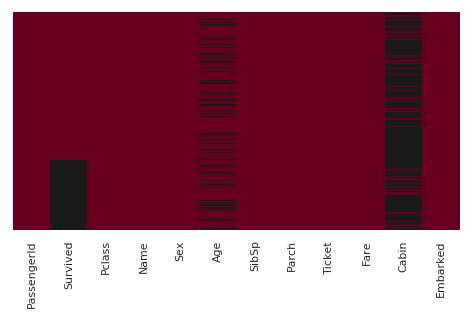

In [12]:
# Visualization of Missing variables
plt.figure(figsize=(8,4))
sns.heatmap(merge.isnull(), yticklabels=False, cbar=False, cmap = 'RdGy')

In [13]:
# Count of missing variables
merge.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

Survived column is showing missing values becuase in test.csv don't have the survived column.

Age, Cabin, Fare and Embarked has missing values.

# 3. Data Preprocessing

In [14]:
#Let's see the Name column.
merge['Name'].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [15]:
# Extracting title from Name and create a new variable Title.
merge['Title'] = merge['Name'].str.extract('([A-Za-z]+)\.')
merge['Title'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [16]:
# let's see the different categories of Title from Name column.
merge['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Ms            2
Mlle          2
Major         2
Sir           1
Jonkheer      1
Countess      1
Lady          1
Mme           1
Don           1
Capt          1
Dona          1
Name: Title, dtype: int64

We can see there are several titles with the very least frequency. So, it makes sense to put them in fewer buckets.
Professionals like Dr, Rev, Col, Major, Capt will be put into 'Officer' bucket.
Titles such as Dona, Jonkheer, Countess, Sir, Lady, Don were usually entitled to the aristocrats.
We would also replace Mlle and Ms with Miss and Mme by Mrs as these are French titles.

In [17]:
# Replacing  Dr, Rev, Col, Major, Capt with 'Officer'
merge['Title'].replace(to_replace = ['Dr', 'Rev', 'Col', 'Major', 'Capt'], value = 'Officer', inplace=True)

# Replacing Dona, Jonkheer, Countess, Sir, Lady with 'Aristocrate'
merge['Title'].replace(to_replace = ['Dona', 'Jonkheer', 'Countess', 'Sir', 'Lady', 'Don'], value = 'Aristocrat', inplace = True)

#  Replace Mlle and Ms with Miss. And Mme with Mrs.
merge['Title'].replace({'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Mrs'}, inplace = True)

In [18]:
# let's see how Tittle looks now
merge['Title'].value_counts()

Mr            757
Miss          264
Mrs           198
Master         61
Officer        23
Aristocrat      6
Name: Title, dtype: int64

In [19]:
# adding parents and siblings data to get family members data
merge['Family Members'] = merge.SibSp + merge.Parch

In [20]:
#Converting binary to numeric
merge.Sex = merge.Sex.map({'male':1,'female':0})

In [21]:
#For Embarked there are 2 rows that are having null values
#imputing Embarked with mode because Embarked is a categorical variable.
merge['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [22]:
# Here S is the most frequent
merge['Embarked'].fillna(value = 'S', inplace = True)

In [23]:
# Impute missing values of Fare. Fare is a numerical variable and only one rows that are having null values. Hence it will be imputed by median.'''
merge['Fare'].fillna(value = merge['Fare'].median(), inplace = True)

In [24]:
# Let's plot correlation heatmap to see which variable is highly correlated with Age. We need to convert categorical variable into numerical to plot correlation heatmap. So convert categorical variables into numerical.
df = merge.loc[:, ['Sex', 'Pclass', 'Embarked', 'Title', 'Parch', 'SibSp', 'Ticket', 'Fare']]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = df.apply(le.fit_transform) # data is converted.
df.head()

,Sex,Pclass,Embarked,Title,Parch,SibSp,Ticket,Fare
0,1,2,2,3,0,1,720,20
1,0,0,0,4,0,1,816,237
2,0,2,2,2,0,0,914,50
3,0,0,2,4,0,1,65,217
4,1,2,2,3,0,0,649,52


In [25]:
 # Inserting Age in variable correlation.
df['Age'] = merge['Age']
# Move Age at index 0.
df = df.set_index('Age').reset_index()
df.head(2)

,Age,Sex,Pclass,Embarked,Title,Parch,SibSp,Ticket,Fare
0,22.0,1,2,2,3,0,1,720,20
1,38.0,0,0,0,4,0,1,816,237


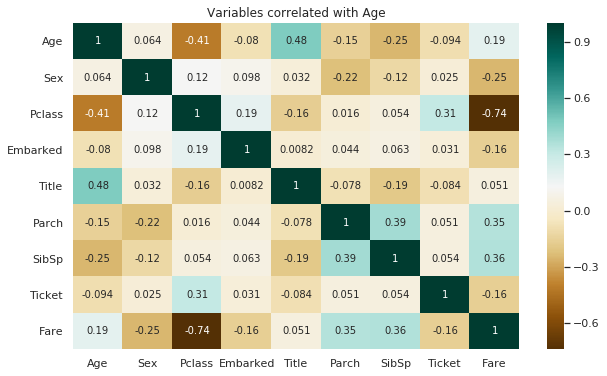

In [26]:
# Now create the heatmap correlation of df
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap ='BrBG',annot = True)
plt.title('Variables correlated with Age')
plt.show()

Sex, Embarked, and Ticket have the weakest correlation with Age.

Pclass and Title have strong correlation with age. So the tactic is to impute missing values of Age with the median age of similar rows according to Title and Pclass.

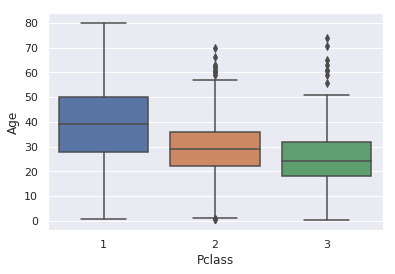

In [27]:
# Create a boxplot to view the correlated and medium of the Pclass and Title variables with Age.
# Boxplot b/w Pclass and Age
sns.boxplot(y='Age', x='Pclass', data=merge)

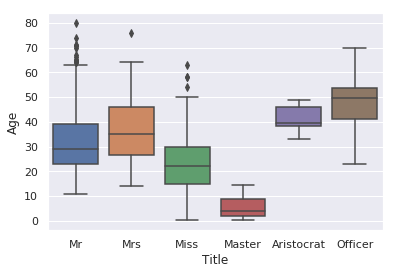

In [28]:
# Boxplot b/w Title and Age
sns.boxplot(y='Age', x='Title', data=merge)

In [29]:
# Impute Age with median of respective columns (i.e., Title and Pclass)
merge['Age'] = merge.groupby(['Title', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

In [30]:
#Since for cabin there are only 204 rows that have values we can say that this coloum is better dropped
merge.drop('Cabin',axis=1,inplace=True)

In [31]:
# creating 'Age Groups' category column from Age column
def age_group(x):
    if (x > 0) and (x <=5):
        return 'infant'
    elif (x > 5) and (x <=12):
        return 'children'
    elif (x > 12) and (x <=18):
        return 'teenager'
    elif (x > 18) and (x <=35):
        return 'yound adults'
    elif (x > 35) and (x <=60):
        return 'adults'
    elif (x > 60) and (x <=80):
        return 'aged'
    else:
        return 'unknown'

merge['Age Groups'] = merge['Age'].apply(age_group)

In [32]:
# creating 'fare Groups' category column from fare column
def fare_group(x):
    if (x > -1) and (x <=130):
        return 'low'
    elif (x > 130) and (x <=260):
        return 'medium'
    elif (x > 260) and (x <=390):
        return 'high'
    elif (x > 390) and (x <=520):
        return 'very high'
    else:
        return 'unknown'

merge['fare Groups'] = merge['Fare'].apply(fare_group)

# Visualisation of the data

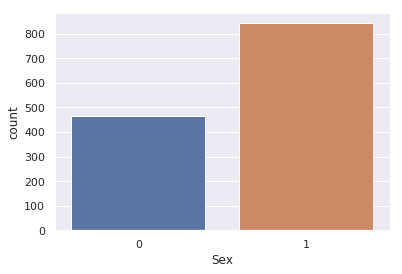

In [33]:
# plotting count plot to know the number of male and female
sns.countplot(merge['Sex'])
plt.show()

As we can see there are more male passengers in the ship than the female passengers

In [34]:
# filtering only survived passengers in the dataset
df_survived = merge[merge['Survived']==1]

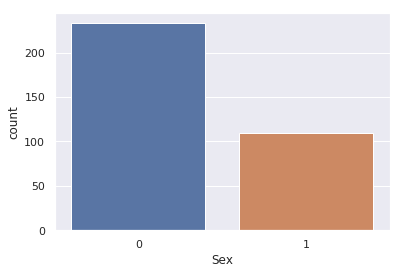

In [35]:
# plotting count plot to know the number of male and female in the survived passengers
sns.countplot(df_survived['Sex'])
plt.show()

As we can see, more female passengers are survived than the male passengers

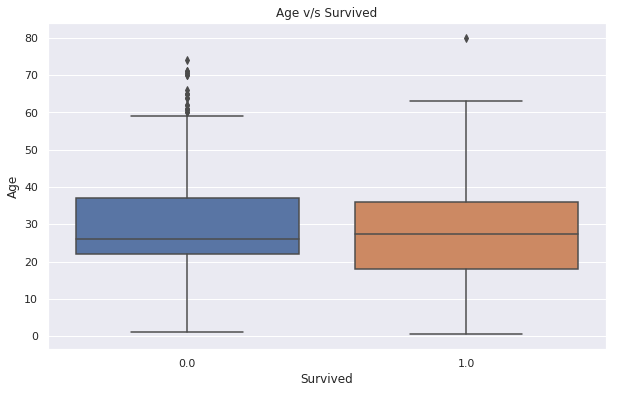

In [36]:
# bin by age group and analyse which age group survived
plt.figure(figsize=(10,6))
sns.boxplot(x = 'Survived', y = 'Age', data = merge)
plt.title("Age v/s Survived")
plt.show()

Median age of the passengers who are survived and who are dead is same but the upper quartile range of the passenger who are not survived is more than that of survived

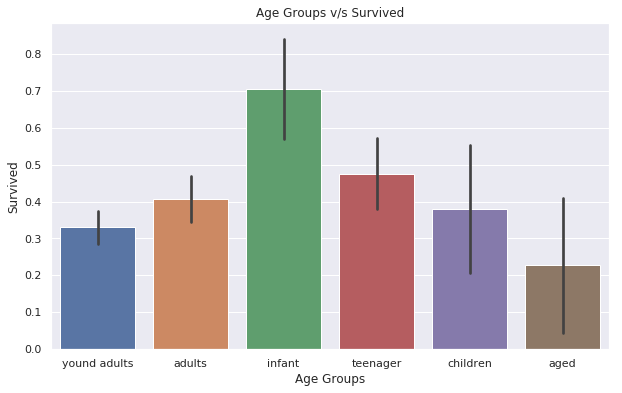

In [37]:
plt.figure(figsize=(10,6))
sns.barplot(y = 'Survived', x = 'Age Groups', data = merge)
plt.title("Age Groups v/s Survived")
plt.show()

It can clearly seen from the graph that, babies are survived more compare to any other age group

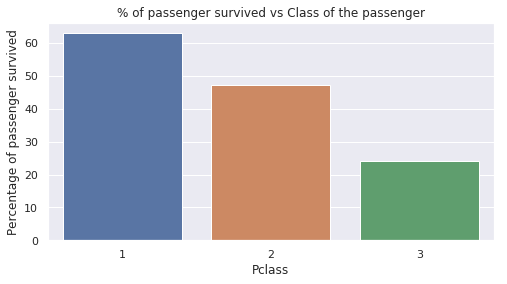

In [38]:
by_pclass_segment_group = merge.pivot_table(values='Survived',index='Pclass',aggfunc='mean')
by_pclass_segment_group.reset_index(inplace=True)
by_pclass_segment_group['Survived'] = 100*by_pclass_segment_group['Survived']
plt.figure(figsize=(8,4))
sns.barplot(x='Pclass',y='Survived', data=by_pclass_segment_group)
plt.xlabel("Pclass")
plt.ylabel("Percentage of passenger survived")
plt.title("% of passenger survived vs Class of the passenger")
plt.show()

Clearly, percentage of passengers belonged to class '1' survived more than the passsenger belonged to class '3'

In [39]:
# droping the feature that would not be useful anymore
merge.drop(columns = ['Name', 'Age','Ticket','Fare','Parch','SibSp'], inplace = True, axis = 1)
merge.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Embarked', 'Title',
       'Family Members', 'Age Groups', 'fare Groups'],
      dtype='object')

In [40]:
merge.head()

,PassengerId,Survived,Pclass,Sex,Embarked,Title,Family Members,Age Groups,fare Groups
0,1,0.0,3,1,S,Mr,1,yound adults,low
1,2,1.0,1,0,C,Mrs,1,adults,low
2,3,1.0,3,0,S,Miss,0,yound adults,low
3,4,1.0,1,0,S,Mrs,1,yound adults,low
4,5,0.0,3,1,S,Mr,0,yound adults,low


In [41]:
# convert categotical data into dummies variables
merge = pd.get_dummies(merge, drop_first=True)
merge.tail()

,PassengerId,Survived,Pclass,Sex,Family Members,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Age Groups_aged,Age Groups_children,Age Groups_infant,Age Groups_teenager,Age Groups_yound adults,fare Groups_low,fare Groups_medium,fare Groups_very high
413,1305,NaN,3,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0
414,1306,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
415,1307,NaN,3,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
416,1308,NaN,3,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0
417,1309,NaN,3,1,2,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0


In [42]:
merge.shape

(1309, 20)

In [ ]:
# Due to merging there are NaN values in Survived for test set observations.
merge['Survived'] = merge['Survived'].astype('int') #Converting without dropping NaN throws an error

In [ ]:
merge

# 4.Model Building and Evaluation 

In [43]:
#Let's split the train and test set to feed machine learning algorithm.
train = merge.iloc[:891, :]
test  = merge.iloc[891:, :]

In [65]:
train['Survived'] = train['Survived'].astype('int')

In [45]:
train.head()

,PassengerId,Survived,Pclass,Sex,Family Members,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Age Groups_aged,Age Groups_children,Age Groups_infant,Age Groups_teenager,Age Groups_yound adults,fare Groups_low,fare Groups_medium,fare Groups_very high
0,1,0,3,1,1,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0
1,2,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,3,1,3,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0
3,4,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0
4,5,0,3,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0


In [46]:
#Drop passengerid from train set and Survived from test set.'''
train = train.drop(columns = ['PassengerId'], axis = 1)
test = test.drop(columns = ['Survived'], axis = 1)

In [47]:
# setting the data as input and output for machine learning models
X_train = train.drop(columns = ['Survived'], axis = 1) 
y_train = train['Survived']

# Extract test set
X_test  = test.drop("PassengerId", axis = 1).copy()

In [48]:
X_test.shape

(418, 18)

In [66]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

84.18

In [68]:
# Support Vector Machines
from sklearn.svm import SVC, LinearSVC
svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

83.5

In [51]:
# K nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

84.62

In [52]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

73.51

In [67]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
acc_linear_svc

83.61

In [54]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

87.21

In [55]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

87.21

Model evaluation

We can now rank our evaluation of all the models to choose the best one for our problem. While both Decision Tree and Random Forest score the same, we choose to use Random Forest as they correct for decision trees' habit of overfitting to their training set.

In [56]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian,acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,87.21
6,Decision Tree,87.21
1,KNN,84.62
2,Logistic Regression,84.18
5,Linear SVC,83.61
0,Support Vector Machines,83.50
4,Naive Bayes,73.51


In [57]:
y_test_pred = random_forest.predict(X_test)

In [58]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": y_test_pred
    })


In [59]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [63]:
submission.to_csv("submission.csv", index=False)